In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# load data from the CSV file
gamma_data = pd.read_csv('/Users/jessicaschatz/Documents/Learning/MIT/Data Analysis- Statistical Modeling and Computation in Applications/Homework/Homework 1/data_and_materials/gamma-ray.csv')

In [3]:
# For H0, the MLE estimator is a single average rate over the whole dataset
lambda_hat_H0 = gamma_data['count'].sum()/gamma_data['seconds'].sum()
# For H1, each bin has its own parameter, lambda_i, and so the MLE estimator is an array of rates for each bin
lambdas_hat_H1 = gamma_data['count']/gamma_data['seconds']
print("H0 = {}".format(lambda_hat_H0))
print("H1 = {}".format(lambdas_hat_H1))

H0 = 0.0038808514969907496
H1 = 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.009804
        ...   
95    0.025840
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64


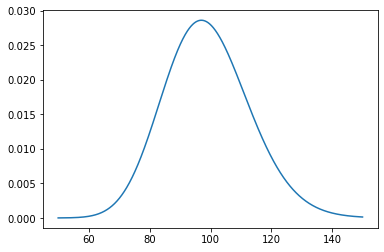

In [4]:
# Here we plot the chi^2 distribution for 99 degrees of freedom in the range of insterest (around the mean)
plot_Xs = np.arange(50,150,0.1)
plt.plot(plot_Xs, scipy.stats.chi2.pdf(plot_Xs, 99))
plt.show()

In [5]:
# The p-value for Lambda can be calculated using the survival function for the chi^2 distribution.
# Thus, we can calculate the Lambda that would give a p-value of 0.05 by using the inverse survival function
scipy.stats.chi2.isf(0.05, 99)

123.22522145336181

In [6]:
def likelihood_H0(lamb):
  # The likelihood function is a product of Poisson distributions. For H0, each Poisson distribution
  # has the same mean.
  return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lamb).prod(axis=0)

def likelihood_H1(lambs):
  # For H1, the means for the Poisson distributions are given by the parameter 'lambs'
  return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lambs).prod(axis=0)

# The test statistic for the MLE is given by calculating the likelihood ratio for the MLE estimators
# calculated earlier.
Lambda_observed = -2*np.log(likelihood_H0(lambda_hat_H0)/likelihood_H1(lambdas_hat_H1))
# Now we can use the survival function to find the p-value for the observed data
# with the MLE estimators.
pvalue = scipy.stats.chi2.sf(Lambda_observed, 99)
print(Lambda_observed, pvalue)

104.39792133021314 0.33576662402509894
